In [2]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math

In [3]:
γ_list = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

In [4]:
[(8*math.pi)/float(γ) for γ in  γ_list]

[316.2265967351352,
 99.99897039238589,
 31.622659673513528,
 9.999897039238588,
 3.1622659673513525,
 0.9999897039238589,
 0.31622659673513526,
 0.09999897039238588]

In [5]:
Q = [316,  100,  31.6,   10,   3.16,    1,    0.316,    0.1]

In [6]:
def read_fidelities(file):
    fidelities = []

    for γ_i in γ_list:

        with h5py.File(file, 'r') as f:
                
            fidelity_list = [f[γ_i][f"D{i}"]["Fidelity"][...] for i in range(1, 11)  if f[γ_i][f"D{i}"]["Fidelity"].size > 0]
            concatenated_list = [item for lst in fidelity_list for item in lst] 
            fidelities.append(concatenated_list) 
    
    return(fidelities)


In [7]:
import pickle

def read_fidelities_from_pickled_df(file_name):

    # Open the pickle file in read mode ('rb' stands for 'read binary')
    with open(file_name, 'rb') as file:
        combined_df = pickle.load(file)
    
    grouped = combined_df.groupby(['Gamma'])['Fidelity'].apply(list).reset_index()

    fidelities = grouped['Fidelity'].tolist()

    return(fidelities)

In [8]:
with open("NonMark.pkl", 'rb') as file:
        NonMark = pickle.load(file)

NonMark

array([1.54209546e-04, 1.29291467e-02, 5.91358315e-05, 7.10188411e-04,
       3.46324351e-02, 4.18774649e-02, 3.01774778e-03, 6.39944833e-04])

In [9]:
kossak_tssos_fids = read_fidelities("KOSSAK_CONSTR_TSSOS_treshold_1e-15_FROB_QO_2024-Sep-06_at_11-57.h5")

lindblad_tssos_fids = read_fidelities("LINDBLAD4_CONSTR_TSSOS_treshold_1e-9_FROB_QO_2024-Sep-06_at_16-19.h5")

benchmark_slsqp_fids = read_fidelities("BENCHMARK_TEST_BENCHMARK_KossakConstrFrob_Jump_NLOPT_LD_SLSQP2024-Sep-15_at_10-53.h5")

benchmark_lindblad_fids = read_fidelities("BENCHMARK_TEST_LindbladFrob_Jump_NLOPT_LD_SLSQP2024-Oct-04_at_11-24.h5")

benchmark = benchmark_lindblad_fids[0:4] + benchmark_slsqp_fids[4:8]

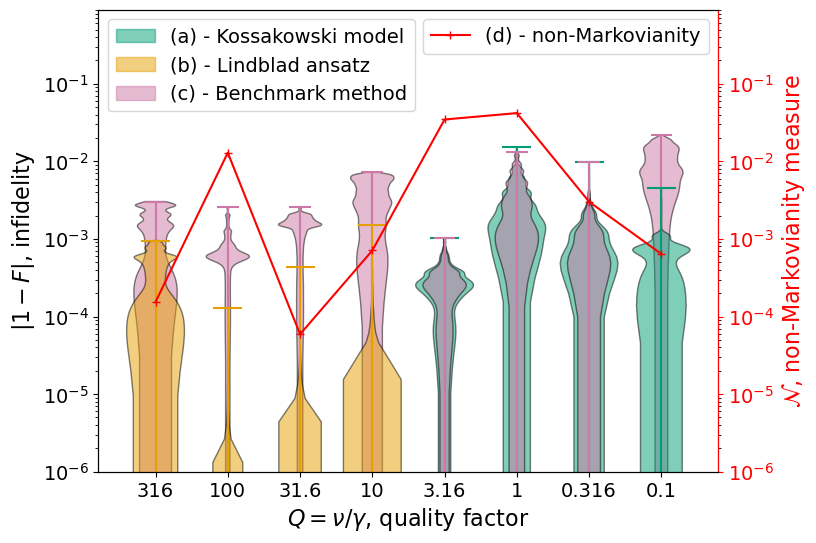

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Define a color-blind-friendly palette (Okabe-Ito)
color_blind_palette = ['#009E73', '#E69F00', '#CC79A7']  # Green, Orange, Purple

# Function to set the colors, transparency, and zorder of the violin plot bodies and components
def set_violin_colors(violin, color, alpha=0.5, zorder=2):
    for body in violin['bodies']:
        body.set_facecolor(color)
        body.set_edgecolor('black')
        body.set_alpha(alpha)
        body.set_zorder(zorder)  # Set zorder for the body
    # Set zorder for the central bars and extrema lines
    violin['cbars'].set_zorder(zorder)
    violin['cmins'].set_zorder(zorder)
    violin['cmaxes'].set_zorder(zorder)
    violin['cbars'].set_color(color)   # Central vertical bar color
    violin['cmins'].set_color(color)   # Lower extrema color
    violin['cmaxes'].set_color(color)  # Upper extrema color

# Set the font sizes globally
plt.rcParams.update({'font.size': 14,  # Increase overall font size
                     'axes.labelsize': 16,  # Axis label size
                     'xtick.labelsize': 14,  # X-axis tick label size
                     'ytick.labelsize': 14,  # Y-axis tick label size
                     'legend.fontsize': 14,  # Legend font size
                     'axes.titlesize': 18})  # Title font size (if you have any)

# Custom labels for the legend
labels = []

# Create the first plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create the first violin plot and set its color (first color in the palette)
violin1 = ax1.violinplot([1-np.abs(_) for _ in kossak_tssos_fids[4:]], positions=[5, 6, 7, 8], widths=0.8)
set_violin_colors(violin1, color_blind_palette[0], alpha=0.5, zorder=2)


# Add custom patch for the first violin plot for the legend
labels.append((mpatches.Patch(color=color_blind_palette[0], alpha=0.5), "(a) - Kossakowski model"))

# Create the second violin plot and set its color (second color in the palette)
violin2 = ax1.violinplot([1-np.abs(_) for _ in lindblad_tssos_fids[:4]], positions=[1, 2, 3, 4], widths=0.8)
set_violin_colors(violin2, color_blind_palette[1], alpha=0.5, zorder=2)

# Add custom patch for the second violin plot for the legend
labels.append((mpatches.Patch(color=color_blind_palette[1], alpha=0.5), "(b) - Lindblad ansatz"))


# Add custom patch for the third violin plot for the legend
labels.append((mpatches.Patch(color=color_blind_palette[2], alpha=0.5), "(c) - Benchmark method"))

# Create the Benchmark violin plot and set it in the background using lower zorder
violin31 = ax1.violinplot([1-np.abs(_) for _ in benchmark[:4]], positions=[1, 2, 3, 4], widths=0.6)
set_violin_colors(violin31, color_blind_palette[2], alpha=0.5, zorder=1)  # Set zorder=1 for background

# Create the Benchmark violin plot and set it in the background using lower zorder
violin32 = ax1.violinplot([1-np.abs(_) for _ in benchmark[4:7]], positions=[5, 6, 7], widths=0.6)
set_violin_colors(violin32, color_blind_palette[2], alpha=0.5, zorder=2)  # Set zorder=1 for background

# Create the Benchmark violin plot and set it in the background using lower zorder
violin33 = ax1.violinplot([1-np.abs(benchmark[7])], positions=[8], widths=0.6)
set_violin_colors(violin33, color_blind_palette[2], alpha=0.5, zorder=1)  # Set zorder=1 for background

# Adding a second y-axis and plotting data
ax2 = ax1.twinx()
ax2.plot(np.arange(1, 9), NonMark, marker="+", color="red", label="(d) - non-Markovianity")
ax2.set_yscale('log')
ax2.set_ylim(1e-6, .9)
ax2.set_ylabel('$\\mathcal{N}$, non-Markovianity measure', color='red')

# Customizing the primary y-axis
ax1.set_yscale('log')
ax1.set_ylim(1e-6, .9)
ax1.set_xticks(range(1, len(γ_list) + 1), Q)
ax1.set_xlabel("$Q= \\nu / \\gamma$, quality factor")
ax1.set_ylabel("$|1 - F|$, infidelity")

# Adding legends
ax1.legend(*zip(*labels), loc=2)

# Customizing the secondary y-axis
ax2.tick_params(axis='y', colors='red')
ax2.spines['right'].set_color('red')
ax2.legend(loc=1)

# Display the plot
plt.show()

fig.savefig("SB_SID_LINDBLAD&KOSSAK_CONSTR_TSSOS_vs_Bench_color-blind.pdf")
